In [1]:
#importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA,KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata,make_circles
from sklearn import metrics

In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\hades\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [4]:
#https://datos.gob.mx/busca/dataset/cancer-de-la-mujer-sicam-cancer-de-mama
path = 'C:\\Users\\hades\\Downloads\\dataset práctica 1\\Mastografías 2017.csv'
daf = pd.read_csv(path, encoding='latin', error_bad_lines=False)
daf.head()

,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad,Resultado
0,1,1,1,57,Altamente Sugestiva a Malignidad
1,1,1,1,57,Altamente Sugestiva a Malignidad
2,1,1,1,57,Probablemente Benigna
3,1,1,1,57,Evaluación Adicional
4,1,1,1,57,Altamente Sugestiva a Malignidad


In [6]:
col=daf.columns#toma las  columnas
features=col.tolist() 
feature=features[:-1] 
target=features[-1]#quita Resultados
X=daf.loc[:,feature].values  
y=daf.loc[:,target].values
#estandarizado
sc=StandardScaler()  
X=sc.fit_transform(X) 
pd.DataFrame(X,columns=feature).head()


,Clave Entidad,Clave Jurisdicción,Clave Municipio,Edad
0,-2.149656,-0.816753,-1.022534,0.826087
1,-2.149656,-0.816753,-1.022534,0.826087
2,-2.149656,-0.816753,-1.022534,0.826087
3,-2.149656,-0.816753,-1.022534,0.826087
4,-2.149656,-0.816753,-1.022534,0.826087


In [5]:
#Definiendo componentes 
pca=PCA(n_components=2) 
principalComponents=pca.fit_transform(X) 
principalDf=pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.304692,-0.543068
1,-2.304692,-0.543068
2,-2.304692,-0.543068
3,-2.304692,-0.543068
4,-2.304692,-0.543068


In [6]:
finalDf=pd.concat([principalDf,daf[['Resultado']]],axis=1)
finalDf.head()

,principal component 1,principal component 2,Resultado
0,-2.304692,-0.543068,Altamente Sugestiva a Malignidad
1,-2.304692,-0.543068,Altamente Sugestiva a Malignidad
2,-2.304692,-0.543068,Probablemente Benigna
3,-2.304692,-0.543068,Evaluación Adicional
4,-2.304692,-0.543068,Altamente Sugestiva a Malignidad


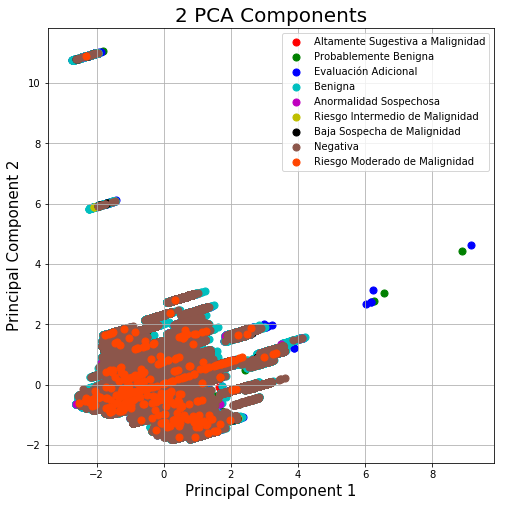

In [19]:
fig=plt.figure(figsize=(8,8))  
ax=fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1',fontsize = 15)  
ax.set_ylabel('Principal Component 2',fontsize = 15)  
ax.set_title('2 PCA Components',fontsize=20)  

targets=['Altamente Sugestiva a Malignidad', 'Probablemente Benigna',
       'Evaluación Adicional', 'Benigna', 'Anormalidad Sospechosa',
       'Riesgo Intermedio de Malignidad', 'Baja Sospecha de Malignidad',
       'Negativa', 'Riesgo Moderado de Malignidad']
colors=['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:brown','orangered','p']  
for target,color in zip(targets,colors):    
    indicesToKeep = finalDf['Resultado'] == target  
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],
        finalDf.loc[indicesToKeep,'principal component 2'],c=color,s=50)
ax.legend(targets)  
ax.grid()

In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30971561, 0.28066606])

In [7]:
X2=daf.loc[:,feature].values  
y2=daf.loc[:,target].values
X_train,X_test,y_train,y_test=train_test_split(X2,y2,test_size=.2,random_state=0)
print('X_train shape',X_train.shape)  
print('X_test shape',X_test.shape)   
print('y_train shape',y_train.shape)  
print('y_test shape',y_test.shape)

X_train shape (684013, 4)
X_test shape (171004, 4)
y_train shape (684013,)
y_test shape (171004,)


In [8]:
X_train_original=X_train.copy()

In [9]:

#fit only on Training data  
sc.fit(X_train)   
#Apply the transformation to both test & train data   
X_train=sc.fit_transform(X_train)   
X_test=sc.fit_transform(X_test)

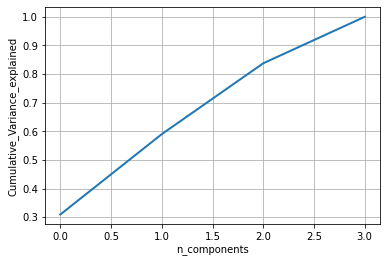

In [10]:
pca=PCA()  
pca.n_components=4 
pca_data=pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum   
plt.figure(1,figsize=(6,4))
plt.clf()  
plt.plot(cum_var_explained,linewidth=2)  
plt.axis('tight')  
plt.grid() 
plt.xlabel('n_components') 
plt.ylabel('Cumulative_Variance_explained')  
plt.show()

In [11]:
pca=PCA()  
pca.n_components=4 
pca_data=pca.fit_transform(X_train)  
# look at explainded variance of PCA components 
exp_var_cumsum=pd.Series(np.round(pca.explained_variance_ratio_.cumsum(),4)*100)  
for index,var in enumerate(exp_var_cumsum):  
    print('if n_components= %d,   variance=%f' %(index,np.round(var,3)))

if n_components= 0,   variance=30.950000
if n_components= 1,   variance=59.030000
if n_components= 2,   variance=83.780000
if n_components= 3,   variance=100.000000


In [12]:
 
pca=PCA(.90)  
pca.fit(X_train)  
print('Number of components to explain 90% Variance is',pca.n_components_)

Number of components to explain 90% Variance is 4


In [13]:
pca=PCA(n_components=2) 
pca_data_vis=pca.fit_transform(X_train) 
print('shape of PCA data',pca_data_vis.shape)

shape of PCA data (684013, 2)


C:\Users\hades\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


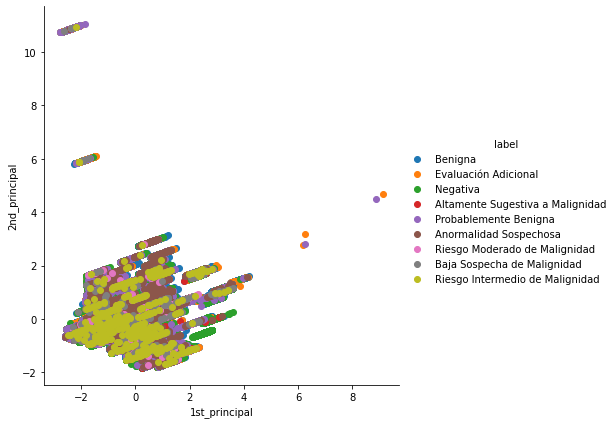

In [14]:
pca_data_vis = np.vstack((pca_data_vis.T,y_train)).T
pca_vis_df = pd.DataFrame(data=pca_data_vis,columns=("1st_principal","2nd_principal","label"))  
sns.FacetGrid(pca_vis_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [15]:
pca=PCA(.90) 
pca.fit(X_train) 
X_train=pca.transform(X_train) 
X_test=pca.transform(X_test)
from sklearn.linear_model  import LogisticRegression  
LogReg=LogisticRegression(class_weight='balanced')  
LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hades\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [16]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score
print('Accuracy:',accuracy_score(y_test,y_pred))  
print('F1 score:',f1_score(y_test,y_pred,average='weighted'))   
print('Recall:',recall_score(y_test,y_pred,average='weighted'))   
print('Precision:',precision_score(y_test,y_pred,average='weighted'))  
print('\n clasification report:\n',classification_report(y_test,y_pred))  
print('\n confussion matrix:\n',confusion_matrix(y_test,y_pred))

Accuracy: 0.7111237164042946


C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 score: 0.6359266541342622
Recall: 0.7111237164042946


C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision: 0.5957337326263107


C:\Users\hades\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



 clasification report:
                                   precision    recall  f1-score   support

Altamente Sugestiva a Malignidad       0.00      0.00      0.00       276
          Anormalidad Sospechosa       0.00      0.00      0.00       693
     Baja Sospecha de Malignidad       0.00      0.00      0.00       163
                         Benigna       0.75      0.95      0.84    125680
            Evaluación Adicional       0.17      0.03      0.05     13988
                        Negativa       0.22      0.08      0.12     25367
           Probablemente Benigna       0.00      0.00      0.00      4647
 Riesgo Intermedio de Malignidad       0.00      0.00      0.00       129
   Riesgo Moderado de Malignidad       0.00      0.00      0.00        61

                        accuracy                           0.71    171004
                       macro avg       0.13      0.12      0.11    171004
                    weighted avg       0.60      0.71      0.64    171004


 confussi